# Decipher Single-byte XOR using ETAOIN SHRDLU

https://www.insider.com/gchq-reveals-last-nazi-message-wwii-2020-5

![final-message](https://i.insider.com/5eb52a95fc593d494f70c193?width=500&format=jpeg&auto=webp)

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
plain_text = b'british troops entered cuxhaven at 1400 on 6 may - from now on all radio traffic will cease - wishing you all the best. lt kunkel.'

In [3]:
key = random.randint(0, 255)

In [4]:
def encrypt_single_xor(text: bytes, key: int) -> bytes:
    return bytes([b ^ key for b in text])

In [5]:
cipher_text = encrypt_single_xor(plain_text, key)

Now we need to find `key` and `plain_text` given this `cipher_text`

In [6]:
def decipher_single_xor(text: bytes, key: int) -> bytes:
    return bytes([b ^ key for b in text])

In [7]:
def decipher(text: bytes, scoring_fn=lambda x: 1):
    plains = []
    for _key in range(key-5, min(key + 5, 256)):
        _plain_text = decipher_single_xor(cipher_text, _key)
        _score = scoring_fn(_plain_text)
        plains.append((_plain_text, _key, _score))
    return sorted(plains, key=lambda x: x[2], reverse=False)

In [8]:
def plot_linears(x1, y1, x2, y2):
    plt.plot(x1, y1)
    plt.plot(x2, y2)
    plt.show()

In [9]:
def scoring_fn_dummy(text: bytes):
    return 1

In [10]:
plains = decipher(cipher_text, scoring_fn=scoring_fn_dummy)

In [11]:
pd.DataFrame(plains, columns=["Plain Text", "Key", "Score"])

,Plain Text,Key,Score
0,"b'\x7fotitnu=iorrmn=xsixoxy=~heu|kxs=|i=,)--=r...",238,1
1,"b'~nuhuot<hnsslo<yrhynyx<\x7fidt}jyr<}h<-(,,<s...",239,1
2,b'aqjwjpk#wqllsp#fmwfqfg#`v{kbufm#bw#2733#lm#5...,240,1
3,"b'`pkvkqj""vpmmrq""glvgpgf""awzjctgl""cv""3622""ml""4...",241,1
4,b'cshuhri!usnnqr!doudsde!btyi`wdo!`u!0511!no!7...,242,1
5,b'british troops entered cuxhaven at 1400 on 6...,243,1
6,"b""eunsnto'suhhwt'bisbubc'dr\x7fofqbi'fs'6377'h...",244,1
7,b'dtoroun&rtiivu&chrctcb&es~ngpch&gr&7266&ih&0...,245,1
8,b'gwlqlvm%qwjjuv%`kq`w`a%fp}mds`k%dq%4155%jk%3...,246,1
9,b'fvmpmwl$pvkktw$ajpava`$gq|leraj$ep$5044$kj$2...,247,1


In [12]:
def scoring_fn_maxfit(text: bytes):
    freqs = {
        'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253,
        'e': 0.12702, 'f': 0.02228, 'g': 0.02015, 'h': 0.06094,
        'i': 0.06094, 'j': 0.00153, 'k': 0.00772, 'l': 0.04025,
        'm': 0.02406, 'n': 0.06749, 'o': 0.07507, 'p': 0.01929,
        'q': 0.00095, 'r': 0.05987, 's': 0.06327, 't': 0.09056,
        'u': 0.02758, 'v': 0.00978, 'w': 0.02360, 'x': 0.00150,
        'y': 0.01974, 'z': 0.00074, ' ': 0.13000
    }
    counter = Counter(text)
    x1, y1 = list(freqs.keys()), [(counter.get(ord(k), 0) * 100)/len(text) for k in freqs]
    x2, y2 = list(freqs.keys()), [(v * 100)/sum(freqs.values()) for v in freqs.values()]
    plot_linears(x1, y1, x2, y2)
    return sum([(a - b)**2 for a, b in zip(y1, y2)])

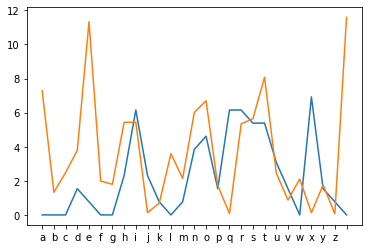

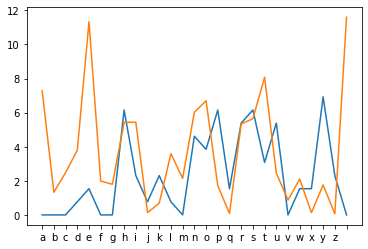

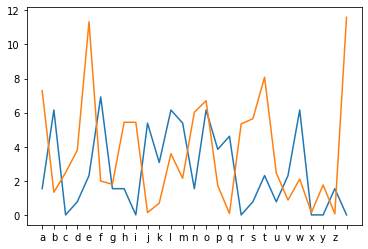

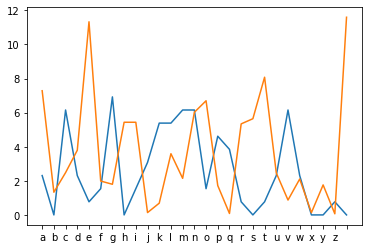

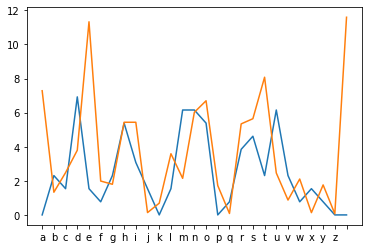

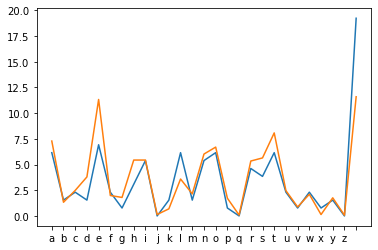

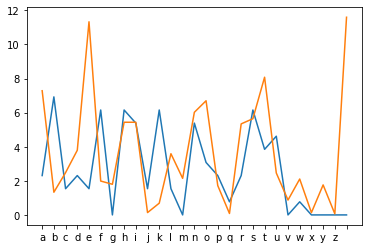

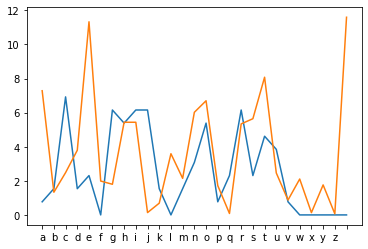

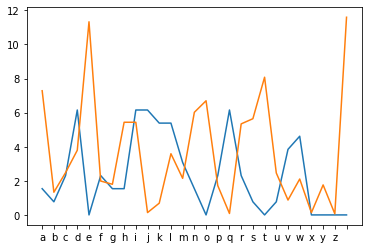

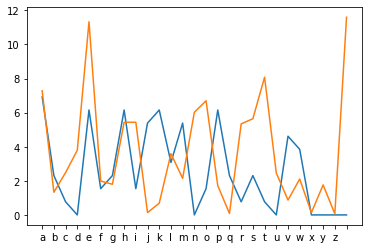

In [13]:
plains = decipher(cipher_text, scoring_fn=scoring_fn_maxfit)

In [14]:
plains[0]

(b'british troops entered cuxhaven at 1400 on 6 may - from now on all radio traffic will cease - wishing you all the best. lt kunkel.',
 243,
 108.1536758546728)

In [15]:
pd.DataFrame(plains, columns=["Plain Text", "Key", "Score"])

,Plain Text,Key,Score
0,b'british troops entered cuxhaven at 1400 on 6...,243,108.153676
1,b'cshuhri!usnnqr!doudsde!btyi`wdo!`u!0511!no!7...,242,387.151118
2,"b""eunsnto'suhhwt'bisbubc'dr\x7fofqbi'fs'6377'h...",244,403.119201
3,b'dtoroun&rtiivu&chrctcb&es~ngpch&gr&7266&ih&0...,245,406.191182
4,"b'~nuhuot<hnsslo<yrhynyx<\x7fidt}jyr<}h<-(,,<s...",239,433.840472
5,"b'\x7fotitnu=iorrmn=xsixoxy=~heu|kxs=|i=,)--=r...",238,454.734278
6,b'fvmpmwl$pvkktw$ajpava`$gq|leraj$ep$5044$kj$2...,247,462.963741
7,b'aqjwjpk#wqllsp#fmwfqfg#`v{kbufm#bw#2733#lm#5...,240,564.379982
8,"b'`pkvkqj""vpmmrq""glvgpgf""awzjctgl""cv""3622""ml""4...",241,596.157843
9,b'gwlqlvm%qwjjuv%`kq`w`a%fp}mds`k%dq%4155%jk%3...,246,601.275528
